<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/RNN_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

# Load the Twitter dataset without headers
file_path = '/content/twitter_training.csv'
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Check the first few rows
print(df.head())
print("Dataset shape:", df.shape)


      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Dataset shape: (74682, 4)


In [23]:
df.columns = ['id', 'entity', 'label', 'tweet']
print("Unique sentiment labels:", df['label'].unique())

Unique sentiment labels: ['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [24]:
import pandas as pd

# Load the dataset
file_path = '/content/twitter_training.csv'
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign meaningful column names
df.columns = ['id', 'entity', 'label', 'tweet']

# Display some basic info
print(df.head())
print("Dataset loaded:", df.shape)
print("Sample labels:", df['label'].unique())

     id       entity     label  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Dataset loaded: (74682, 4)
Sample labels: ['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [25]:
df.tail()

,id,entity,label,tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [26]:
print(df['label'].value_counts())

label
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [28]:
print("Dataset shape:", df.shape)

Dataset shape: (74682, 4)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
# step 1 : load the dataset
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

vocab_size = 10000
max_len = 250

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

# Convert the 'tweet' column to string and fill NaN values with empty strings
df['tweet'] = df['tweet'].astype(str).fillna('')

tokenizer.fit_on_texts(df['tweet'])

In [32]:
# Step 2 : Preprocess the data
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [33]:
# Step 3 : Build the model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(SimpleRNN(units=32))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer = 'SGD' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

# Summary
model.summary()

# Step 4 : Training the model
history = model.fit(x_train, y_train, batch_size = 64, epochs = 20, validation_data = (x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 374s 942ms/step - accuracy: 0.5088 - loss: 0.6949 - val_accuracy: 0.5182 - val_loss: 0.6925
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 398s 985ms/step - accuracy: 0.5237 - loss: 0.6920 - val_accuracy: 0.5153 - val_loss: 0.6921
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 443s 990ms/step - accuracy: 0.5273 - loss: 0.6907 - val_accuracy: 0.5047 - val_loss: 0.6915
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 441s 988ms/step - accuracy: 0.5406 - loss: 0.6884 - val_accuracy: 0.5992 - val_loss: 0.6818
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 442s 987ms/step - accuracy: 0.5466 - loss: 0.6857 - val_accuracy: 0.6097 - val_loss: 0.6751
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 449s 1s/step - accuracy: 0.5666 - loss: 0.6796 - val_accuracy: 0.6042 - val_loss: 0.6689
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 435s 987ms/step - accuracy: 0.5880 - loss: 0.6702 - val_accuracy: 0.6076 - val_loss: 0.6595
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 456s 1s/step - accuracy: 0.5982 - loss:

In [34]:
# Step 5 -> Evaluate the model
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.7731 - loss: 0.4845
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.7606 - loss: 0.4967


In [41]:
# Step 6 -> Prediction
sample_review = "This movie was fantastic! I loved every minute of it."

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the input text
sample_review_tokens = tokenizer.texts_to_sequences([sample_review.lower()])
sample_review_tokens_padded = pad_sequences(sample_review_tokens, maxlen = max_len)

# Making the predictions
prediction = model.predict([sample_review_tokens_padded])
print(f"Predicted Sentiment: {'Positive' if prediction > 0.5 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicted Sentiment: Positive


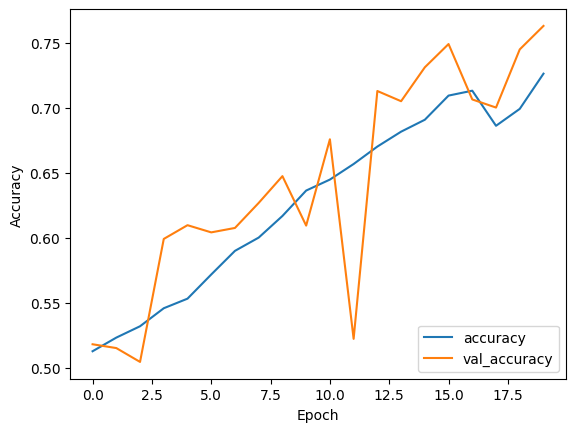

In [40]:
# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
